In [7]:
import pandas as pd

trades = pd.read_csv("historical_data.csv", on_bad_lines='skip')
sentiment = pd.read_csv("fear_greed_index.csv")

/tmp/ipython-input-3568082896.py:3: DtypeWarning: Columns (2,3,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv", on_bad_lines='skip')


In [8]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.0,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
print(trades.columns)
print(sentiment.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [16]:
trades["date"] = pd.to_datetime(trades["Timestamp IST"], errors="coerce").dt.date

In [17]:
sentiment["date"] = pd.to_datetime(sentiment["date"], errors="coerce").dt.date

In [27]:
trades = trades.dropna(subset=["date", "Closed PnL", "Size USD"])
sentiment = sentiment.dropna(subset=["date", "classification"])

In [28]:
sentiment["classification"].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [29]:
merged = pd.merge(trades, sentiment, on="date", how="inner")

In [33]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.0,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.0,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed


In [34]:
merged.to_csv("merged_data.csv", index=False)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
risk_summary = merged.groupby("classification")["Size USD"].mean().reset_index()
risk_summary

,classification,Size USD
0,Extreme Fear,4083.380824
1,Extreme Greed,3068.997108
2,Fear,6266.907877
3,Greed,5105.160206
4,Neutral,2562.740780


In [40]:
merged.rename(columns={"classification": "Classification"}, inplace=True)

In [41]:
def simplify_sentiment(x):
    if "Fear" in x:
        return "Fear"
    elif "Greed" in x:
        return "Greed"
    else:
        return "Neutral"

merged["Simple_Sentiment"] = merged["Classification"].apply(simplify_sentiment)

In [42]:
merged["Simple_Sentiment"].value_counts()

,count
Simple_Sentiment,
Fear,13730
Greed,11999
Neutral,1717


In [43]:
simple_risk_summary = (
    merged
    .groupby("Simple_Sentiment")["Size USD"]
    .mean()
    .reset_index()
)
simple_risk_summary

,Simple_Sentiment,Size USD
0,Fear,5907.810712
1,Greed,4361.050265
2,Neutral,2562.740780


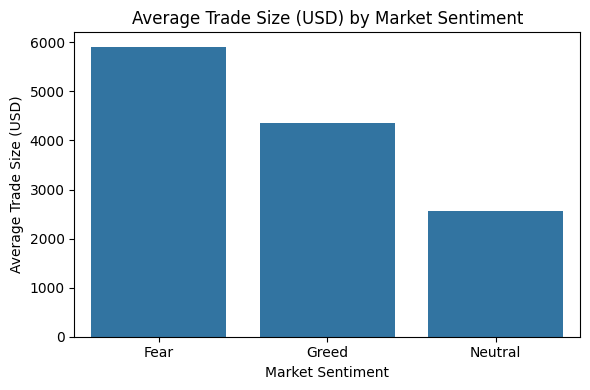

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x="Simple_Sentiment", y="Size USD", data=simple_risk_summary)
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.tight_layout()
plt.savefig("risk_vs_sentiment.png")
plt.show()

In [47]:
pnl_summary = (
    merged
    .groupby("Simple_Sentiment")["Closed PnL"]
    .mean()
    .reset_index()
)

pnl_summary

,Simple_Sentiment,Closed PnL
0,Fear,115.895983
1,Greed,28.365887
2,Neutral,28.882913


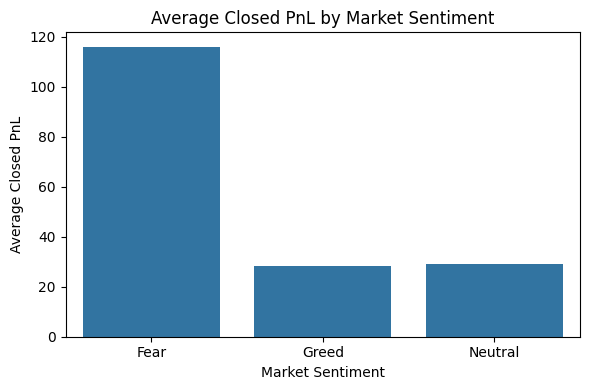

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x="Simple_Sentiment", y="Closed PnL", data=pnl_summary)
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.savefig("pnl_vs_sentiment.png")
plt.show()

In [50]:
behavior_summary = (
    merged
    .groupby(["Simple_Sentiment", "Side"])
    .size()
    .reset_index(name="count")
)

behavior_summary

,Simple_Sentiment,Side,count
0,Fear,BUY,7452
1,Fear,SELL,6278
2,Greed,BUY,4779
3,Greed,SELL,7220
4,Neutral,BUY,608
5,Neutral,SELL,1109


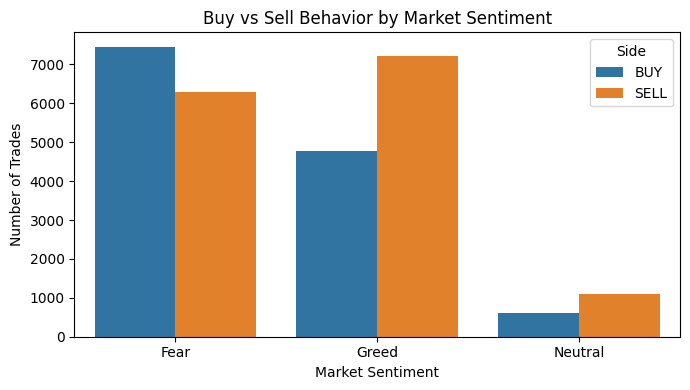

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.barplot(x="Simple_Sentiment", y="count", hue="Side", data=behavior_summary)
plt.title("Buy vs Sell Behavior by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.savefig("buy_sell_sentiment.png")
plt.show()

In [53]:
merged.to_csv("final_cleaned_data.csv", index=False)

In [54]:
simple_risk_summary.to_csv("risk_summary.csv", index=False)

In [55]:
pnl_summary.to_csv("pnl_summary.csv", index=False)